**Workflow for the project.**


1. Problem definition and desired outcome.
2. Data collection (Use the available dataset)
3. Data cleaning and preprocessing.
4. EDA analysis.
5. Feature engineering and feature selection.
6. ML model selection.
7. Model training.
8. Model evaluation and training

The machine learning project is a classification task to test on churn rates of customers based on the input features.

In [1]:
#Import all the needed libraries here. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from collections import Counter
from sklearn.feature_selection import SelectFromModel, RFECV
import json
import joblib
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
# reading the dataframe.
data=pd.read_csv("Customer data.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


3. **Data cleaning and preprocessing.**

In [3]:
# Checking for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
#  Checking for duplicate values.
data.duplicated().sum()

0

In [5]:
# Dropping irrelevant columns.

data = data.drop(["RowNumber", "CustomerId", "Surname","Geography"], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


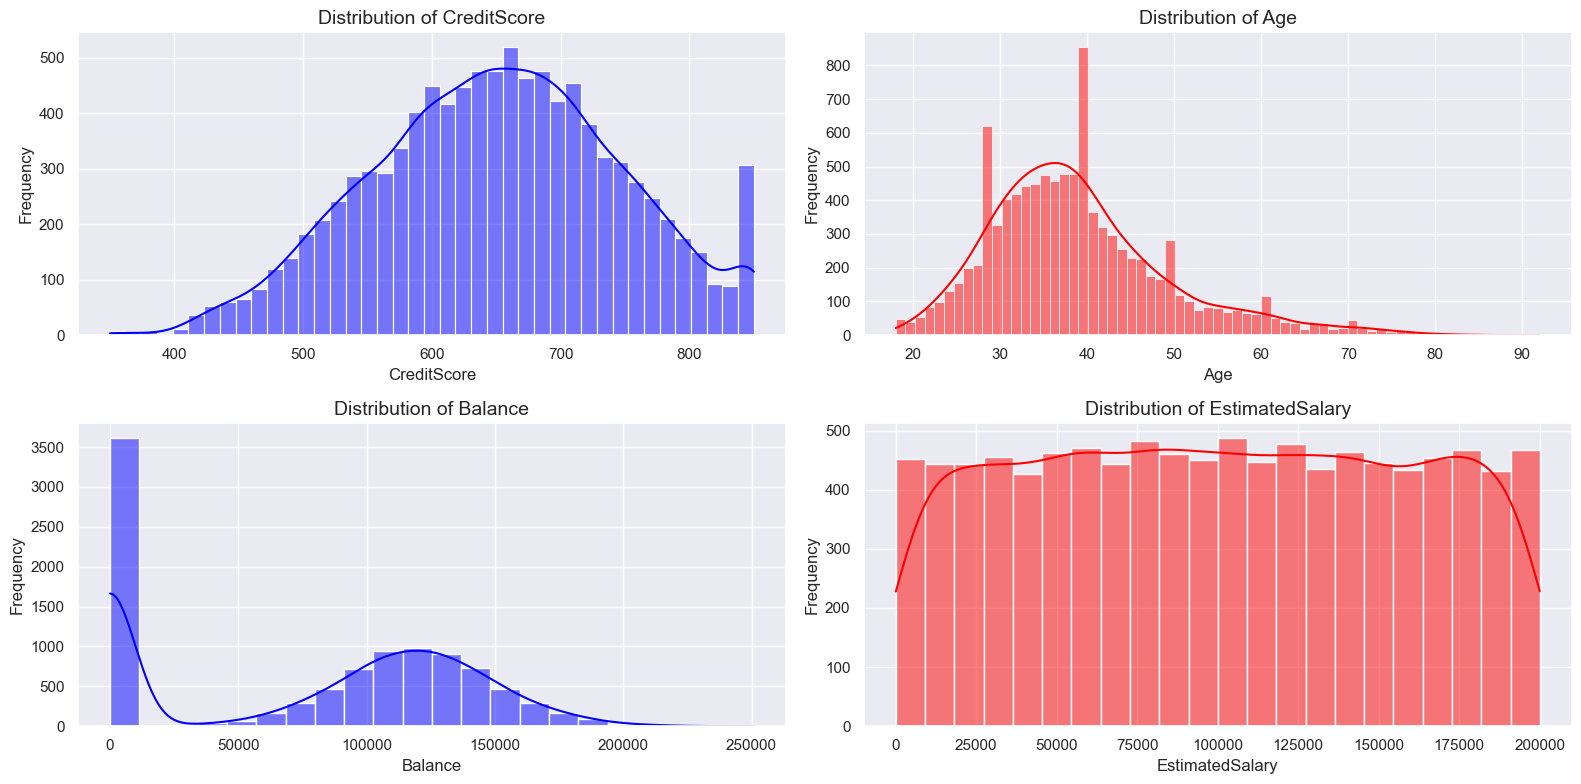

In [6]:
# Viewing how data is distributed

plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("CreditScore", "blue"), ("Age", "red"), ("Balance", "blue"), ("EstimatedSalary", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(data=data, x=col, kde=True, color=color)
    plt.title(f"Distribution of {col}", fontsize=14)  
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()


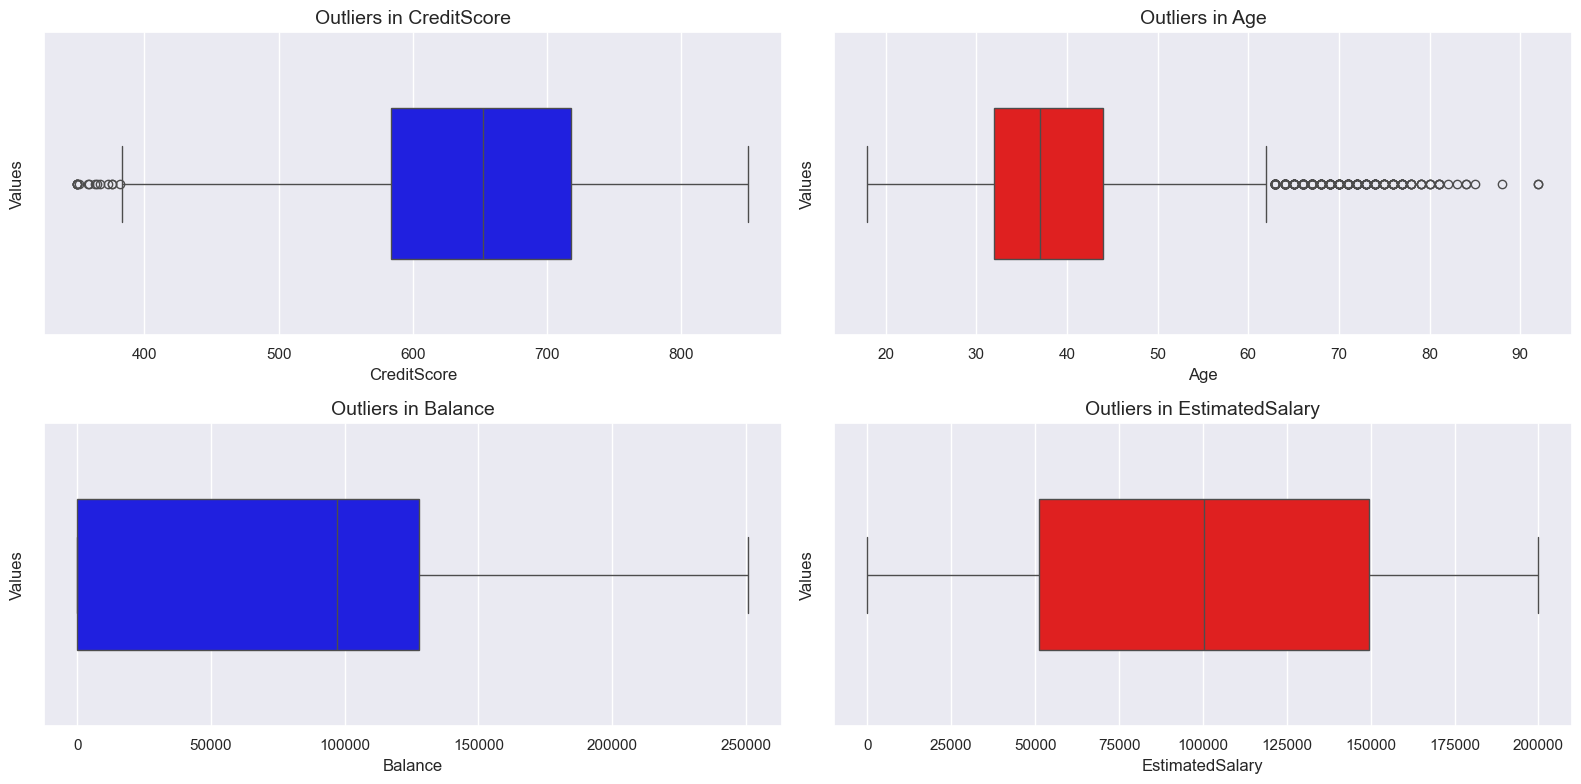

In [7]:
# Checking for outliers in the same columns
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("CreditScore", "blue"), ("Age", "red"), ("Balance", "blue"), ("EstimatedSalary", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=data, x=col, color=color, width=0.5)  
    plt.title(f"Outliers in {col}", fontsize=14)
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Values", fontsize=12)

plt.tight_layout()
plt.show()



- The outliers are not significant and I will work with them

In [8]:
# Checking the dtypes of the columns.
data.dtypes

# Data is of the right data types.

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


**3. Data preprocessing.**
- I will convert categorical columns to continious variables.

In [10]:
data["Gender"]=data["Gender"].map({"Male":0,"Female":1})

**4. EDA analysis**

In [11]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**-Indepth analysis using visualizations.**

In [12]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


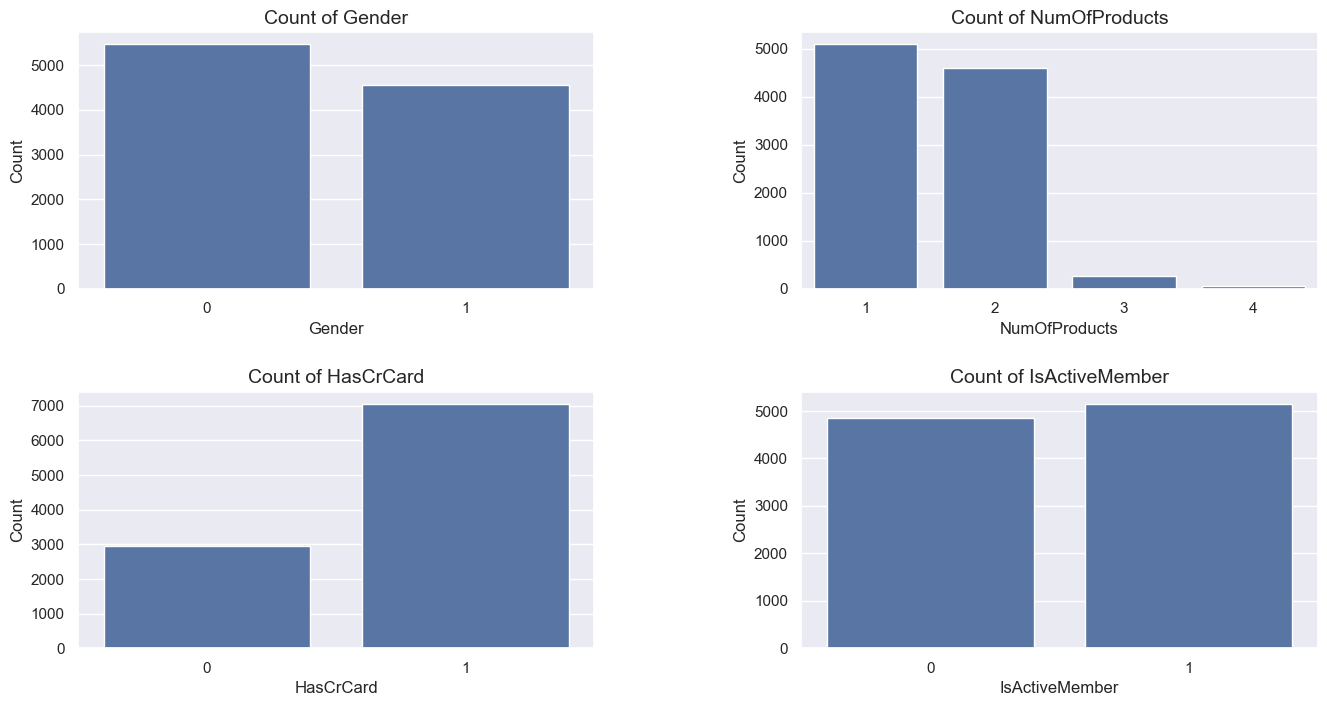

In [13]:

plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

categorical_columns = ["Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(data=data, x=col)  
    plt.title(f"Count of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Count", fontsize=12)


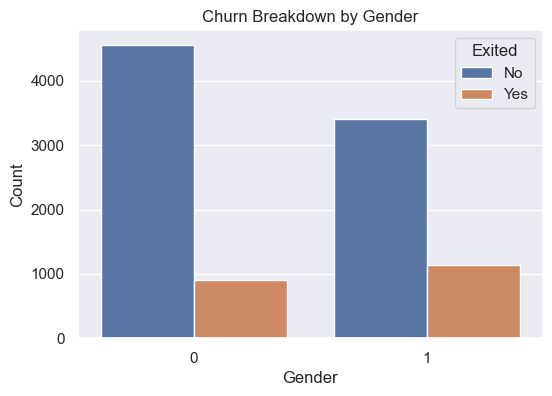

In [14]:
# Visualizing the distribution of the target variable.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Gender", hue="Exited")
plt.title("Churn Breakdown by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()


**Performing feature selection for the model**

- The features of the dataset are quite small so I will keep all the features of the data.

In [15]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0


In [16]:
X = data.drop("Exited", axis=1)
y = data["Exited"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [19]:
# Scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train the model using dtree classifier
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred = dtree.predict(X_train_scaled)
y_test_pred = dtree.predict(X_test_scaled)

# Calculate and print the accuracy on the training data
print(f"Accuracy on training data: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test, y_test_pred)}")

print(f"Precision on training data: {precision_score(y_train, y_train_pred)}")
print(f"Precision on test data: {precision_score(y_test, y_test_pred)}")

print(f"Recall on training data: {recall_score(y_train, y_train_pred)}")
print(f"Recall on test data: {recall_score(y_test, y_test_pred)}")

Accuracy on training data: 1.0
Accuracy on test data: 0.772
Precision on training data: 1.0
Precision on test data: 0.4279176201372998
Recall on training data: 1.0
Recall on test data: 0.4758269720101781


- Model seems to be overfitting on the decision tree due to poor performance in the test data.

In [21]:
rforest = RandomForestClassifier(random_state=42)

rforest.fit(X_train_scaled, y_train)
y_train_pred = rforest.predict(X_train_scaled)
y_test_pred = rforest.predict(X_test_scaled)

print(f"Accuracy on training data: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test, y_test_pred)}")

print(f"Precision on training data: {precision_score(y_train, y_train_pred)}")
print(f"Precision on test data: {precision_score(y_test, y_test_pred)}")

print(f"Recall on training data: {recall_score(y_train, y_train_pred)}")
print(f"Recall on test data: {recall_score(y_test, y_test_pred)}")


Accuracy on training data: 1.0
Accuracy on test data: 0.8615
Precision on training data: 1.0
Precision on test data: 0.75
Recall on training data: 1.0
Recall on test data: 0.44274809160305345


- Model predicts a false negative of 219 (predicts them as "not exited" but "exited")
- Model predicts a false positive of 58  (Predicts that they "not exited" but "exited")

- Precision of 0.75 shows the propotion of predicted positives that are actually correct.
- 75% of the predictions are correct while 25% are False positives

- Recall of 0.44 shows propotion of actual positives were identified as positive by the model.
- Model captures 44% of the actual positives but misses.

- Model is struggling to evaluate the False negatives(Whether a client churned), which might be due to an imbalance of the data set as it is strongly dominated by those that did not churn.

- I will use the oversampling technique to balance the data and perform cross validation.

In [23]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)

print("Class distribution before SMOTE:", Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution before SMOTE: Counter({0: 6356, 1: 1644})
Class distribution after SMOTE: Counter({0: 6356, 1: 6356})


In [24]:
catboost = CatBoostClassifier(iterations=500, depth=7, learning_rate=0.05, l2_leaf_reg=3, loss_function="Logloss")
catboost.fit(X_train_smote, y_train_smote) 
y_train_pred = catboost.predict(X_train_smote)
y_test_pred = catboost.predict(X_test_scaled)

print(f"Accuracy on training data: {accuracy_score(y_train_smote, y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test, y_test_pred)}")

print(f"Precision on training data: {precision_score(y_train_smote, y_train_pred)}")
print(f"Precision on test data: {precision_score(y_test, y_test_pred)}")

print(f"Recall on training data: {recall_score(y_train_smote, y_train_pred)}")  
print(f"Recall on test data: {recall_score(y_test, y_test_pred)}")

0:	learn: 0.6632676	total: 134ms	remaining: 1m 6s
1:	learn: 0.6373169	total: 165ms	remaining: 41s
2:	learn: 0.6162645	total: 191ms	remaining: 31.6s
3:	learn: 0.5953531	total: 209ms	remaining: 25.9s
4:	learn: 0.5779339	total: 223ms	remaining: 22.1s
5:	learn: 0.5631470	total: 236ms	remaining: 19.4s
6:	learn: 0.5521497	total: 251ms	remaining: 17.7s
7:	learn: 0.5406843	total: 266ms	remaining: 16.4s
8:	learn: 0.5303509	total: 280ms	remaining: 15.3s
9:	learn: 0.5205453	total: 295ms	remaining: 14.5s
10:	learn: 0.5117914	total: 310ms	remaining: 13.8s
11:	learn: 0.5059109	total: 321ms	remaining: 13.1s
12:	learn: 0.4989222	total: 333ms	remaining: 12.5s
13:	learn: 0.4940370	total: 350ms	remaining: 12.1s
14:	learn: 0.4889093	total: 361ms	remaining: 11.7s
15:	learn: 0.4837403	total: 375ms	remaining: 11.3s
16:	learn: 0.4791374	total: 388ms	remaining: 11s
17:	learn: 0.4748654	total: 398ms	remaining: 10.7s
18:	learn: 0.4707203	total: 412ms	remaining: 10.4s
19:	learn: 0.4667243	total: 422ms	remaining: 

- The catboost has improved the models generalization but I will perfom hyperparameter tuning to even find better optimal parameters.
- I will retrain the model again and perform cross validation using 5 folds. 

In [25]:
# Performing grid search.

param_dist ={
    "iterations": [100, 200, 300],
    "depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5],
}

grid = GridSearchCV(estimator=catboost, param_grid=param_dist, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 0.6349317	total: 11.8ms	remaining: 3.53s
1:	learn: 0.5910237	total: 29.7ms	remaining: 4.43s
2:	learn: 0.5604339	total: 40.5ms	remaining: 4.01s
3:	learn: 0.5359820	total: 54.8ms	remaining: 4.06s
4:	learn: 0.5163968	total: 69.3ms	remaining: 4.09s
5:	learn: 0.5029890	total: 81.5ms	remaining: 3.99s
6:	learn: 0.4931189	total: 93.6ms	remaining: 3.92s
7:	learn: 0.4821990	total: 105ms	remaining: 3.83s
8:	learn: 0.4738377	total: 115ms	remaining: 3.71s
9:	learn: 0.4649783	total: 126ms	remaining: 3.67s
10:	learn: 0.4567014	total: 137ms	remaining: 3.59s
11:	learn: 0.4509376	total: 148ms	remaining: 3.54s
12:	learn: 0.4469500	total: 158ms	remaining: 3.48s
13:	learn: 0.4421744	total: 169ms	remaining: 3.45s
14:	learn: 0.4378258	total: 182ms	remaining: 3.46s
15:	learn: 0.4338912	total: 194ms	remaining: 3.45s
16:	learn: 0.4302600	total: 207ms	remaining: 3.45s
17:	learn: 0.4268219	total: 218ms	remaining: 3.41s
18:	learn: 0.4179763	to

In [26]:
grid.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [27]:
grid.best_score_

0.8876798530267596

In [28]:
grid.best_estimator_

In [29]:
best_model = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg=1, learning_rate=0.1, loss_function="Logloss")
best_model.fit(X_train_smote, y_train_smote)
y_train_pred = best_model.predict(X_train_smote)
y_test_pred = best_model.predict(X_test_scaled)

print(f"Accuracy on training data: {accuracy_score(y_train_smote, y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test, y_test_pred)}")

print(f"Precision on training data: {precision_score(y_train_smote, y_train_pred)}")
print(f"Precision on test data: {precision_score(y_test, y_test_pred)}")

print(f"Recall on training data: {recall_score(y_train_smote, y_train_pred)}")
print(f"Recall on test data: {recall_score(y_test, y_test_pred)}")

0:	learn: 0.6349317	total: 17.2ms	remaining: 5.16s
1:	learn: 0.5910237	total: 31.4ms	remaining: 4.68s
2:	learn: 0.5604339	total: 62.8ms	remaining: 6.21s
3:	learn: 0.5359820	total: 74.7ms	remaining: 5.53s
4:	learn: 0.5163968	total: 86ms	remaining: 5.07s
5:	learn: 0.5029890	total: 98.3ms	remaining: 4.82s
6:	learn: 0.4931189	total: 109ms	remaining: 4.56s
7:	learn: 0.4821990	total: 122ms	remaining: 4.46s
8:	learn: 0.4738377	total: 133ms	remaining: 4.3s
9:	learn: 0.4649783	total: 146ms	remaining: 4.24s
10:	learn: 0.4567014	total: 163ms	remaining: 4.28s
11:	learn: 0.4509376	total: 174ms	remaining: 4.18s
12:	learn: 0.4469500	total: 187ms	remaining: 4.13s
13:	learn: 0.4421744	total: 201ms	remaining: 4.11s
14:	learn: 0.4378258	total: 212ms	remaining: 4.03s
15:	learn: 0.4338912	total: 226ms	remaining: 4.01s
16:	learn: 0.4302600	total: 238ms	remaining: 3.96s
17:	learn: 0.4268219	total: 249ms	remaining: 3.91s
18:	learn: 0.4179763	total: 261ms	remaining: 3.85s
19:	learn: 0.4144333	total: 271ms	rema

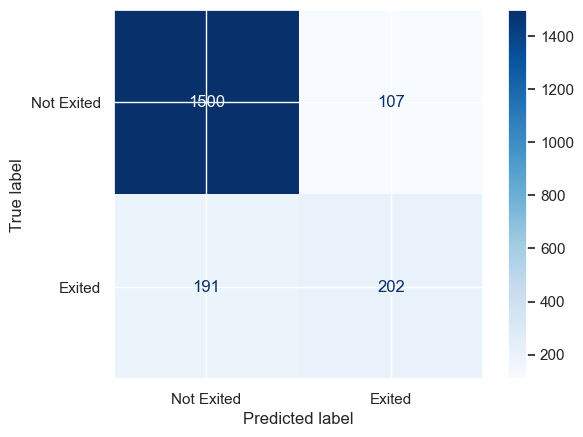

In [34]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.show()

In [30]:
cv_scores = cross_val_score(catboost, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
print("Cross-validation scores:", cv_scores)


0:	learn: 0.6610650	total: 14.3ms	remaining: 7.12s
1:	learn: 0.6331705	total: 24.5ms	remaining: 6.1s
2:	learn: 0.6108604	total: 35.6ms	remaining: 5.89s
3:	learn: 0.5901987	total: 44.6ms	remaining: 5.53s
4:	learn: 0.5728299	total: 54.7ms	remaining: 5.42s
5:	learn: 0.5569322	total: 63.6ms	remaining: 5.24s
6:	learn: 0.5447569	total: 73.5ms	remaining: 5.18s
7:	learn: 0.5332032	total: 82ms	remaining: 5.04s
8:	learn: 0.5234580	total: 91.5ms	remaining: 4.99s
9:	learn: 0.5144477	total: 100ms	remaining: 4.9s
10:	learn: 0.5077813	total: 110ms	remaining: 4.9s
11:	learn: 0.5016353	total: 119ms	remaining: 4.84s
12:	learn: 0.4939449	total: 130ms	remaining: 4.86s
13:	learn: 0.4887696	total: 139ms	remaining: 4.82s
14:	learn: 0.4833242	total: 154ms	remaining: 4.98s
15:	learn: 0.4776126	total: 163ms	remaining: 4.94s
16:	learn: 0.4724988	total: 174ms	remaining: 4.94s
17:	learn: 0.4680166	total: 183ms	remaining: 4.89s
18:	learn: 0.4630835	total: 194ms	remaining: 4.9s
19:	learn: 0.4595500	total: 203ms	rema

This shows the model generalizes well after the cross validation process with an avaerage mean score of 0.90 meaning it predicts about 90% correctly across the folds.

In [31]:
# save the model
joblib.dump(best_model, "catboost_model.pkl")

['catboost_model.pkl']